In [1]:
import pandas as pd
from PIL.ImageColor import colormap

In [2]:
df = pd.read_csv("C:/Users/diego/Desktop/cursos/paises_vida.csv")
df

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...,...
1699,1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [4]:
df.dropna()

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...,...
1699,1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [5]:
df_2002=df[df['year']==2002]
df_2002

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
10,10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
22,22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
34,34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
46,46,Angola,Africa,2002,41.003,10866106,2773.287312,AGO,24
58,58,Argentina,Americas,2002,74.340,38331121,8797.640716,ARG,32
...,...,...,...,...,...,...,...,...,...
1654,1654,Vietnam,Asia,2002,73.017,80908147,1764.456677,VNM,704
1666,1666,West Bank and Gaza,Asia,2002,72.370,3389578,4515.487575,PSE,275
1678,1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,YEM,887
1690,1690,Zambia,Africa,2002,39.193,10595811,1071.613938,ZMB,894


In [6]:
import plotly.express as px

In [13]:
fig = px.scatter(
    df_2002, x="gdpPercap",
    y="lifeExp",
    size="pop",
    size_max=60,
    color="continent",
    log_x=True,

)
fig.show()

In [14]:
import seaborn as sns
sns.set(style="whitegrid")

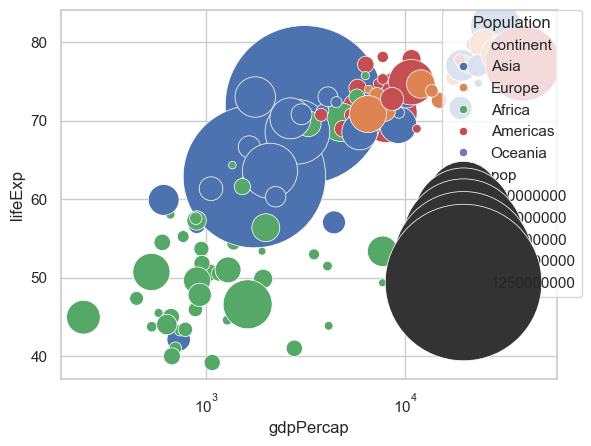

In [22]:
from matplotlib import pyplot as plt

sns.scatterplot(
    data=df_2002, x="gdpPercap",
    y="lifeExp",
    size="pop",
    hue="continent",
    sizes=(30,13000),
    legend=True,
)
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0., title="Population")

In [27]:
df_Asia=df[df['continent']=='Asia']
df_Asia_Agrupado=df_Asia.groupby('year').agg({
    'lifeExp':'mean',
    'gdpPercap':'mean'
})
df_Asia_Agrupado

,lifeExp,gdpPercap
year,,
1952,46.314394,5195.484004
1957,49.318544,5787.732940
1962,51.563223,5729.369625
1967,54.663640,5971.173374
1972,57.319269,8187.468699
1977,59.610556,7791.314020
1982,62.617939,7434.135157
1987,64.851182,7608.226508
1992,66.537212,8639.690248


<Axes: xlabel='year'>

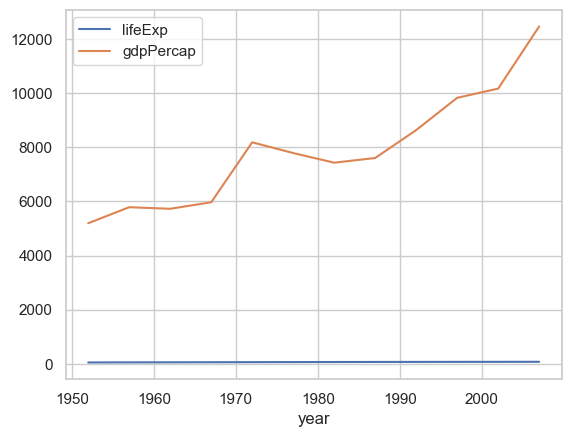

In [28]:
df_Asia_Agrupado.plot.line(
    y=['lifeExp','gdpPercap'],
    grid = True
)

In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Expectativa de vida')

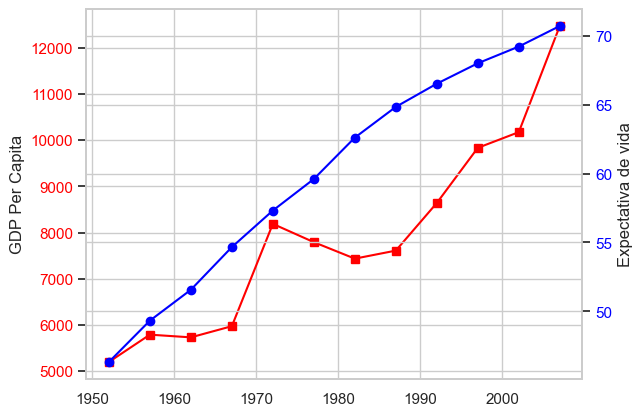

In [32]:
fig, ax1 = plt.subplots()
ax1.plot(df_Asia_Agrupado.index.values,
         df_Asia_Agrupado['gdpPercap'],
         color='red',
         marker='s',

)
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylabel('GDP Per Capita')
ax2=ax1.twinx()
ax2.plot(
    df_Asia_Agrupado.index.values,
    df_Asia_Agrupado['lifeExp'],
    color='blue',
    marker='o'
)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel('Expectativa de vida')

In [33]:
df=df[df['continent']=='Africa']
df

,index,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
24,24,Algeria,Africa,1952,43.077,9279525,2449.008185,DZA,12
25,25,Algeria,Africa,1957,45.685,10270856,3013.976023,DZA,12
26,26,Algeria,Africa,1962,48.303,11000948,2550.816880,DZA,12
27,27,Algeria,Africa,1967,51.407,12760499,3246.991771,DZA,12
28,28,Algeria,Africa,1972,54.518,14760787,4182.663766,DZA,12
...,...,...,...,...,...,...,...,...,...
1699,1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [34]:
df_Africa_Agrupado=df.groupby('year').agg({
    'lifeExp':'mean',
    'pop':'sum',
    'gdpPercap':'mean'
})
df_Africa_Agrupado.reset_index()

,year,lifeExp,pop,gdpPercap
0,1952,39.135500,237640501,1252.572466
1,1957,41.266346,264837738,1385.236062
2,1962,43.319442,296516865,1598.078825
3,1967,45.334538,335289489,2050.363801
4,1972,47.450942,379879541,2339.615674
5,1977,49.580423,433061021,2585.938508
6,1982,51.592865,499348587,2481.592960
7,1987,53.344788,574834110,2282.668991
8,1992,53.629577,659081517,2281.810333
9,1997,53.598269,743832984,2378.759555


<Axes: xlabel='year', ylabel='gdpPercap'>

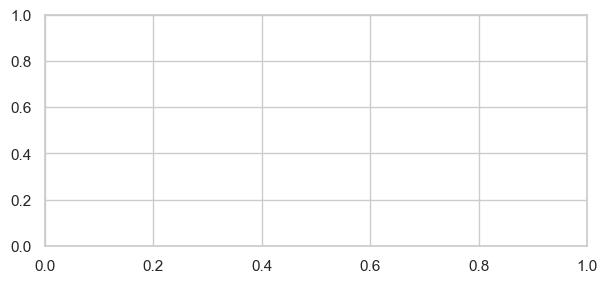

In [44]:
fig,ax=plt.subplots(
    figsize = (7,3),
)
sns.barplot(
    data=df_Africa_Agrupado,
    x='year',
    y='lifeExp',
    color='blue',
    ax=ax1,
    alpha=0.8,
)
ax2=ax1.twinx()
sns.lineplot(
    data=df_Africa_Agrupado['gdpPercap'],
    ax=ax2,
    color='red',
    linewidth=1,
    marker='o',
)
